In [23]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import umap.umap_ as umap
import random


In [24]:
data_dir = './GSE61260/'

In [25]:
df = pd.read_csv(os.path.join(data_dir, 'combined.csv'))

df.head()

,Sample_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,Disease,characteristics_ch1_age,characteristics_ch1_bmi,characteristics_ch1_Sex_male
0,GSM1501013,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,...,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,normal control,70,27.1,1
1,GSM1501014,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,...,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,healthy obese,49,30.5,0
2,GSM1501015,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,...,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,normal control,76,25.3,0
3,GSM1501016,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,...,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,normal control,48,25.8,1
4,GSM1501017,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,...,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,normal control,73,23.5,0


In [26]:
le = LabelEncoder()

y = le.fit_transform(df['Disease'])

print(le.classes_)

X = df.drop(columns = ['Sample_ID', 'Disease'])
X.head()

['healthy obese' 'nafld' 'nash' 'normal control' 'pbc' 'psc']


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,characteristics_ch1_age,characteristics_ch1_bmi,characteristics_ch1_Sex_male
0,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,3.010408,...,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,70,27.1,1
1,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,3.464364,...,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,49,30.5,0
2,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,2.829070,...,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,76,25.3,0
3,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,2.733645,...,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,48,25.8,1
4,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,2.708227,...,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,73,23.5,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)

(106, 21664)
(27, 21664)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(106, 21664)
(27, 21664)


In [29]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}


svm = SVC()

svm_model = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.7407407407407407


                precision    recall  f1-score   support

 healthy obese       0.60      0.60      0.60         5
         nafld       0.67      0.80      0.73         5
          nash       1.00      1.00      1.00         4
normal control       0.67      0.75      0.71         8
           pbc       1.00      0.50      0.67         2
           psc       1.00      0.67      0.80         3

      accuracy                           0.74        27
     macro avg       0.82      0.72      0.75        27
  weighted avg       0.77      0.74      0.74        27


Confusion Matrix:


<Axes: >

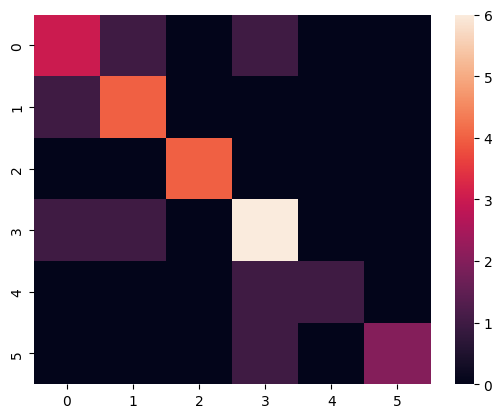

In [30]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)

In [31]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

pca = PCA(n_components=20, svd_solver='arpack')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca.shape)
print(X_test_pca.shape)

svm = SVC()

svm_model = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

(106, 20)
(27, 20)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.5925925925925926


/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: divide by zero encountered in matmul
  X_transformed -= xp.reshape(self.mean_, (1, -1)) @ self.components_.T
/Users/jaydn/Documen

                precision    recall  f1-score   support

 healthy obese       0.29      0.40      0.33         5
         nafld       0.00      0.00      0.00         5
          nash       0.67      0.50      0.57         4
normal control       0.73      1.00      0.84         8
           pbc       1.00      1.00      1.00         2
           psc       1.00      0.67      0.80         3

      accuracy                           0.59        27
     macro avg       0.61      0.59      0.59        27
  weighted avg       0.55      0.59      0.56        27


Confusion Matrix:


<Axes: >

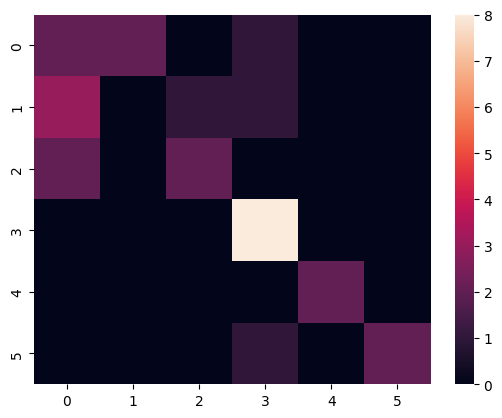

In [32]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)

In [33]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

reducer = umap.UMAP(n_components=20)
X_train_umap = reducer.fit_transform(X_train_scaled)
X_test_umap = reducer.transform(X_test_scaled)
print(X_train_umap.shape)
print(X_test_umap.shape)

svm = SVC()

svm_model = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

svm_model.fit(X_train_umap, y_train)

y_pred = svm_model.predict(X_test_umap)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

(106, 20)
(27, 20)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.48148148148148145


                precision    recall  f1-score   support

 healthy obese       0.50      0.60      0.55         5
         nafld       0.75      0.60      0.67         5
          nash       0.33      0.25      0.29         4
normal control       0.36      0.50      0.42         8
           pbc       0.50      0.50      0.50         2
           psc       1.00      0.33      0.50         3

      accuracy                           0.48        27
     macro avg       0.57      0.46      0.49        27
  weighted avg       0.54      0.48      0.48        27


Confusion Matrix:


<Axes: >

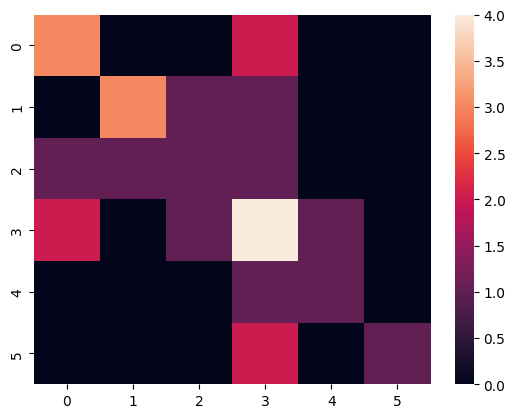

In [34]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)